In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import warnings
from time import time

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotnine as gg
import pymc3 as pm
import seaborn as sns

In [3]:
from src.io.cache_io import temp_dir
from src.io.data_io import DataFile
from src.loggers import set_console_handler_level
from src.managers.data_managers import CrisprScreenDataManager
from src.models.speclet_eight import SpecletEight
from src.plot.color_pal import SeabornColor
from src.plot.plotnine_helpers import set_gg_theme

In [4]:
notebook_tic = time()

warnings.simplefilter(action="ignore", category=UserWarning)
set_console_handler_level(logging.INFO)
set_gg_theme()
%config InlineBackend.figure_format = "retina"

RANDOM_SEED = 1026
np.random.seed(RANDOM_SEED)

In [11]:
from src.models.speclet_eight import SpecletEight

[10/15/21 10:07:44] INFO     Creating a new SpecletEight object.          ]8;id=387003;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_eight.py\speclet_eight.py]8;;\:91

                    INFO     Adding new transformation.                  ]8;id=468919;file:///Users/admin/Lab_Projects/speclet/src/managers/data_managers.py\data_managers.py]8;;\:171

                    INFO     Adding new transformation.                  ]8;id=93294;file:///Users/admin/Lab_Projects/speclet/src/managers/data_managers.py\data_managers.py]8;;\:171

                    INFO     Adding new transformation.                  ]8;id=143880;file:///Users/admin/Lab_Projects/speclet/src/managers/data_managers.py\data_managers.py]8;;\:171

                    INFO     Calling `model_specification()` method.     ]8;id=588755;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_model.py\speclet_model.py]8;;\:205

                    INFO     Creating SpecletEight model.                ]8;id=489397;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_eight.py\speclet_eight.py]8;;\:122

                    INFO     Getting data - reading from file.           ]8;id=743403;file:///Users/admin/Lab_Projects/speclet/src/managers/data_managers.py\data_managers.py]8;;\:126

                    WARNING  Dropping 0 sgRNA that map to multiple genes.     ]8;id=92494;file:///Users/admin/Lab_Projects/speclet/src/data_processing/achilles.py\achilles.py]8;;\:616

                    INFO     Adding 'rna_expr_gene_lineage' column. ]8;id=77576;file:///Users/admin/Lab_Projects/speclet/src/modeling/feature_engineering.py\feature_engineering.py]8;;\:73

[10/15/21 10:07:45] INFO     Number of data points: 960                  ]8;id=333827;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_eight.py\speclet_eight.py]8;;\:126

                    INFO     Number of sgRNA: 160                        ]8;id=84499;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_eight.py\speclet_eight.py]8;;\:128

                    INFO     Number of genes: 101                        ]8;id=551092;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_eight.py\speclet_eight.py]8;;\:129

                    INFO     Number of cell lines: 6                     ]8;id=263639;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_eight.py\speclet_eight.py]8;;\:130

                    INFO     Number of lineages: 1                       ]8;id=767638;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_eight.py\speclet_eight.py]8;;\:131

                    INFO     Creating shared variables.                  ]8;id=575735;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_eight.py\speclet_eight.py]8;;\:134

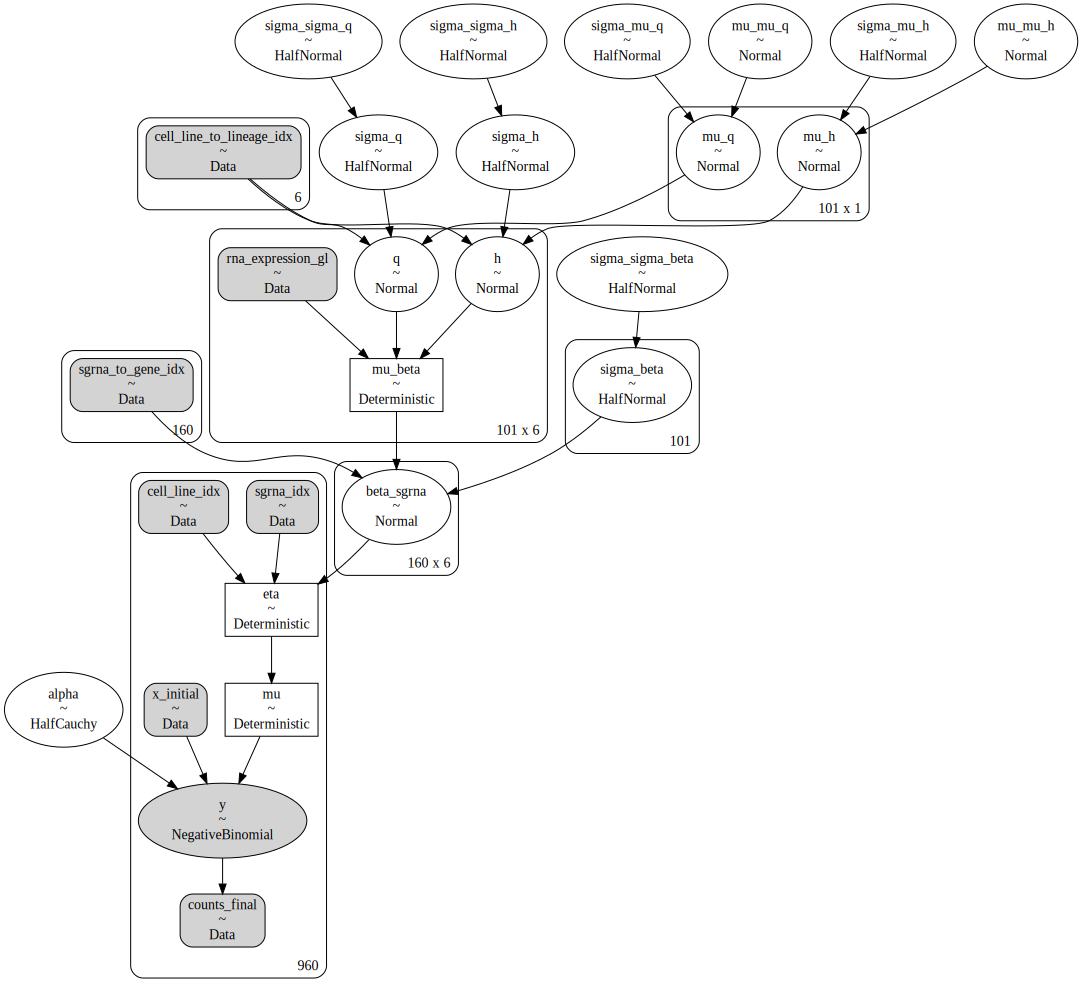

In [12]:
dm = CrisprScreenDataManager(DataFile.DEPMAP_CRC_SUBSAMPLE)
sp8 = SpecletEight("design-model", data_manager=dm, root_cache_dir=temp_dir())
sp8.build_model()
pm.model_to_graphviz(sp8.model)

In [14]:
sp8_mcmc_post = sp8.mcmc_sample_model(
    draws=1000,
    tune=500,
    chains=2,
    cores=2,
    target_accept=0.85,
    prior_pred_samples=-1,
    random_seed=RANDOM_SEED,
    ignore_cache=True,
    sample_kwargs={"init": "advi", "n_init": 20000},
)

[10/15/21 10:12:56] INFO     Beginning MCMC sampling.                    ]8;id=895432;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_model.py\speclet_model.py]8;;\:304

Auto-assigning NUTS sampler...
Initializing NUTS using advi...


Finished [100%]: Average Loss = 7,299
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, beta_sgrna, sigma_beta, sigma_sigma_beta, q, sigma_q, sigma_sigma_q, mu_q, sigma_mu_q, mu_mu_q, h, sigma_h, sigma_sigma_h, mu_h, sigma_mu_h, mu_mu_h]


KeyError: 0

In [15]:
sp8_vars: list[str] = [
    "mu_mu_h",
    "sigma_mu_h",
    "mu_h",
    "sigma_sigma_h",
    "sigma_h",
    "h",
    "mu_beta_sgrna",
    "sigma_sigma_beta_sgrna",
    "sigma_beta_sgrna",
    "beta_sgrna",
    "alpha",
]

In [16]:
az.plot_trace(sp8_mcmc_post, var_names=sp8_vars);

NameError: name 'sp8_mcmc_post' is not defined

In [17]:
az.summary(sp8_mcmc_post, var_names=sp8_vars).query("r_hat > 1.1")

NameError: name 'sp8_mcmc_post' is not defined

In [18]:
# az.plot_pair(
#     sp8_mcmc_post,
#     var_names=["beta_sgrna", "beta_batch"],
#     coords={"sgrna": "AGCTGAGCGCAGGGACCGGG", "batch": "2", "cell_line": "ACH-000007"},
#     divergences=True,
# );

In [19]:
ax = az.plot_pair(
    sp8_mcmc_post,
    var_names=["mu_beta_batch", "sigma_beta_batch"],
    divergences=True,
)
ax.set_yscale("log");

NameError: name 'sp8_mcmc_post' is not defined

In [ ]:
df = sp8.data_manager.get_data()

[10/15/21 07:50:30] INFO     Getting data - already loaded.              ]8;id=238700;file:///Users/admin/Lab_Projects/speclet/src/managers/data_managers.py\data_managers.py]8;;\:123

---

In [20]:
notebook_toc = time()
print(f"execution time: {(notebook_toc - notebook_tic) / 60:.2f} minutes")

execution time: 27.32 minutes


In [21]:
%load_ext watermark
%watermark -d -u -v -iv -b -h -m

Last updated: 2021-10-15

Python implementation: CPython
Python version       : 3.9.6
IPython version      : 7.26.0

Compiler    : Clang 11.1.0 
OS          : Darwin
Release     : 20.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit

Hostname: JHCookMac.local

Git branch: speclet-eight

arviz     : 0.11.2
pandas    : 1.3.2
plotnine  : 0.8.0
numpy     : 1.21.2
matplotlib: 3.4.3
sys       : 3.9.6 | packaged by conda-forge | (default, Jul 11 2021, 03:36:15) 
[Clang 11.1.0 ]
logging   : 0.5.1.2
pymc3     : 3.11.2
seaborn   : 0.11.2

